# Image Classification with TensorFlow in Machine Learning

Let's get started with the task of Image Classification with TensorFlow by importing some necessary packages:


In [1]:
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

In [3]:
fashion_mnist = tf.keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()


4431872/4422102 [==============================] - 0s 0us/step


In [5]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

### Preprocess The Data
**the data must be preprocessed before training the neural network.**


- If you inspect the first frame of the training set, you will find that the pixel values are between 0 and 255:


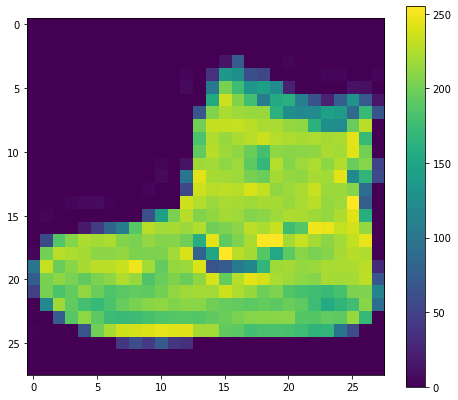

In [14]:
plt.figure(figsize=(8,7))
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

**Before passing these values to the neural network model.We have to scale them to a range of 0 to 1, We need to divide the values by 255.**

In [15]:
train_images = train_images / 255.0
test_images = test_images / 255.0

**To verify that the data is in the correct format and to verify that we are ready to create and train the neural network for image classification with TensorFlow, let’s display the first 25 images of the training set and display the name of the class under each image:**


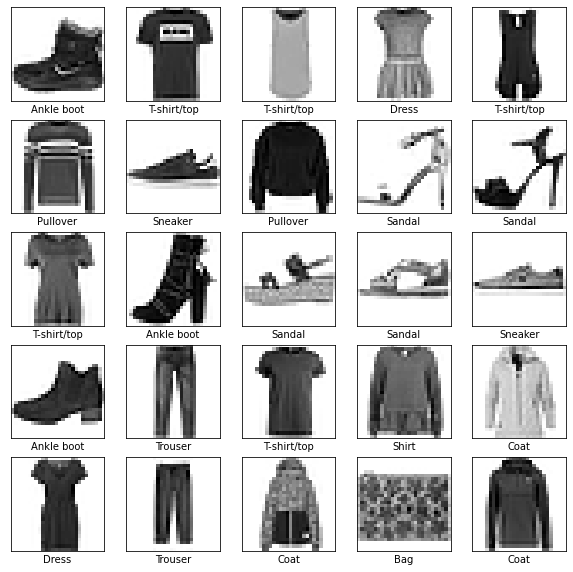

In [16]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

### Building The Image Classification Model.

**We need to configure the model layers and then move forward with compiling the model.**

#### Setting Up Layers


In [17]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10)
])

#### Compiling The Model


In [19]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

#### Training Model

In [20]:
#Fitting the Model
model.fit(train_images, train_labels, epochs=10)
#Evaluating Accuracy
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)
print('\nTest accuracy:', test_acc)

Epoch 1/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.5014 - accuracy: 0.8237
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3735 - accuracy: 0.8662
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3363 - accuracy: 0.8767
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3094 - accuracy: 0.8868
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2945 - accuracy: 0.8916
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2778 - accuracy: 0.8976
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2675 - accuracy: 0.9009
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2578 - accuracy: 0.9043
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2466 - accuracy: 0.9083
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.238

In [21]:
#Make Predictions
probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])
predictions = probability_model.predict(test_images)
predictions[0]

array([8.3850565e-11, 2.1333302e-15, 2.6066245e-13, 6.1164520e-17,
       1.0246628e-12, 8.8995503e-04, 1.8515485e-10, 1.5676187e-04,
       1.9633588e-07, 9.9895298e-01], dtype=float32)

**They represent the “confidence” of the model that the image matches each of the 10 different garments.**



**Let's see which label has the highest confidence value:**


In [33]:
np.argmax(predictions[0])


9

In [23]:
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

#### Verify Predictions


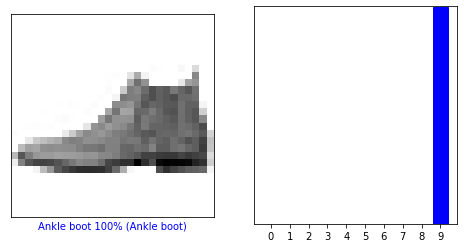

In [30]:
i = 0
plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

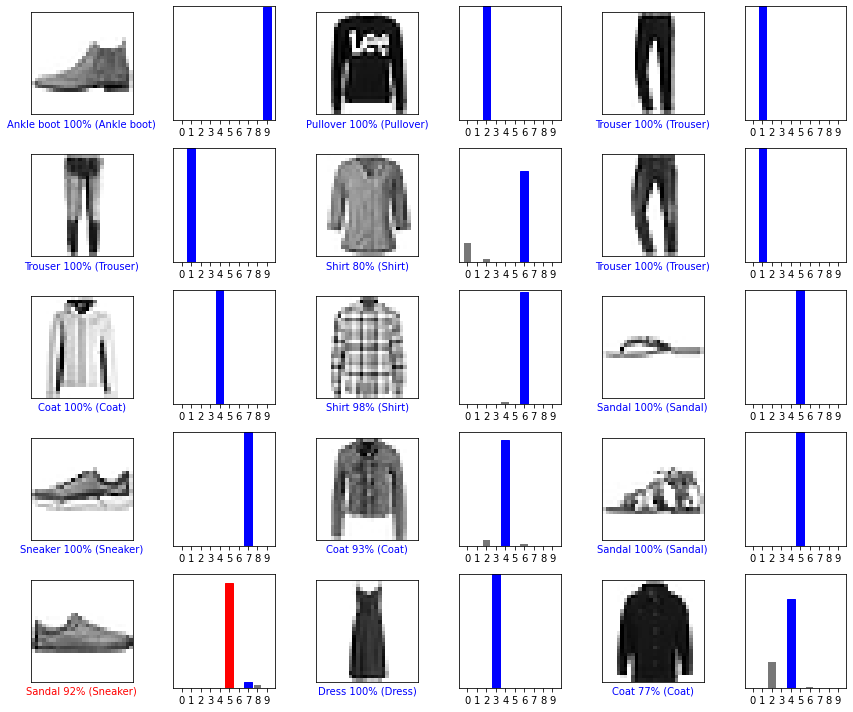

In [31]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()